# Sales Forecasting

The goal of this project is to analyze historical sales data and predict future daily sales.

This notebook covers a complete data analysis workflow:
- data loading and cleaning
- daily sales aggregation
- exploratory data analysis (EDA)
- trend analysis and visualization
- simple sales forecasting

The results are used to support business decisions
related to demand planning and sales strategy.


## Data Loading

In this section, we load the raw sales dataset
and perform an initial data preview to understand
the structure and available features.


In [1]:
import pandas as pd

df = pd.read_csv("sales_forecast_2025_mock.csv")
df.head()


,date,sales,store_id,product_id,category,price,quantity,promo,is_holiday
0,2025-09-19,54.03,7,124,Beauty,13.72,4,0.0,0
1,2025-08-26,11.18,7,115,Grocery,1.87,6,0.0,0
2,2025-09-25,11.20,2,129,Sports,11.06,1,0.0,0
3,2025-01-30,23.90,7,112,Grocery,11.87,2,0.0,0
4,2025-09-20,317.20,4,103,Electronics,317.19,1,0.0,0


### Data Loading Summary

The dataset was successfully loaded and reviewed.
All required features are present and ready
for further cleaning and analysis.


## Data Cleaning and Preparation

In this section, we clean and prepare the raw sales data
to ensure data quality and consistency for further analysis.
This includes data type conversion, handling missing values,
and removing invalid and duplicate records.


In [2]:
import pandas as pd

# Load data
df = pd.read_csv("sales_forecast_2025_mock.csv")

# Parse date
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Convert numbers 
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")

# Clean category text
df["category"] = df["category"].astype(str).str.strip().str.title()

# Drop invalid rows
df = df.dropna(subset=["date", "sales"])
df = df[df["quantity"] > 0]
df = df[df["sales"] >= 0]

# Fill promo / holiday
df["promo"] = df["promo"].fillna(0).astype(int)
df["is_holiday"] = df["is_holiday"].fillna(0).astype(int)

# Remove duplicates
df = df.drop_duplicates(subset=["date", "store_id", "product_id"])

# Sort and save
df_clean = df.sort_values("date").reset_index(drop=True)
df_clean.to_csv("sales_clean_2025.csv", index=False)

df_clean.head()


,date,sales,store_id,product_id,category,price,quantity,promo,is_holiday
0,2025-01-01,446.53,4,111,Clothing,111.69,4,0,1
1,2025-01-01,51.96,1,106,Clothing,13.19,4,0,1
2,2025-01-01,46.22,4,122,Beauty,9.26,5,0,1
3,2025-01-02,24.62,6,114,Grocery,1.98,15,1,0
4,2025-01-04,8.67,5,113,Grocery,2.20,4,0,0


### Data Cleaning Summary

- Date and numeric fields were successfully standardized.
- Invalid, missing, and duplicate records were removed.
- Promotional and holiday indicators were cleaned and validated.
- The dataset is fully prepared for aggregation and forecasting.


## Daily Sales Aggregation

In this section, the cleaned sales data is aggregated
to a daily level to create a continuous time series.
Missing days are added and filled to ensure
a complete dataset for trend analysis and forecasting.


In [3]:
import pandas as pd

# nicer float display
pd.set_option("display.float_format", "{:.2f}".format)

# load cleaned data
df = pd.read_csv("sales_clean_2025.csv")
df["date"] = pd.to_datetime(df["date"])

# create daily table
df_daily = (
    df.groupby("date")
      .agg(
          sales=("sales", "sum"),
          promo=("promo", "max"),
          is_holiday=("is_holiday", "max")
      )
      .sort_index()
)

# add missing days
df_daily = df_daily.asfreq("D")

# fill missing values
df_daily["sales"] = df_daily["sales"].fillna(0)
df_daily["promo"] = df_daily["promo"].fillna(0).astype(int)
df_daily["is_holiday"] = df_daily["is_holiday"].fillna(0).astype(int)

df_daily.to_csv("df_daily_sales.csv")

df_daily.head()




,sales,promo,is_holiday
date,,,
2025-01-01,544.71,0,1
2025-01-02,24.62,1,0
2025-01-03,0.00,0,0
2025-01-04,8.67,0,0
2025-01-05,134.60,0,0


### Daily Aggregation Summary

- Sales were successfully aggregated to daily totals.
- Missing dates were added to ensure a continuous time series.
- Sales, promotion, and holiday indicators were properly aligned.
- The dataset is ready for time series analysis and forecasting.


## Sales Trend Analysis

In this section, we visualize daily sales over time
to identify overall trends, variability, and short-term
patterns using a rolling average.


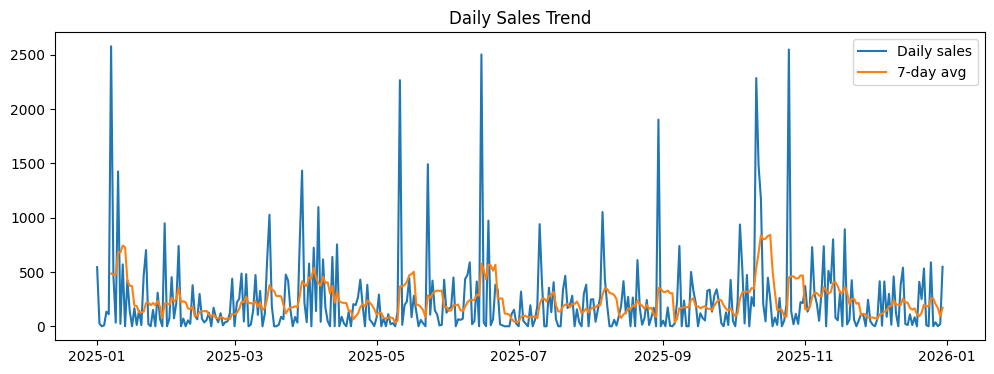

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df_daily.index, df_daily["sales"], label="Daily sales")
plt.plot(df_daily.index, df_daily["sales"].rolling(7).mean(), label="7-day avg")
plt.title("Daily Sales Trend")
plt.legend()
plt.show()


### Sales Trend Summary

- Daily sales show high short-term variability.
- The 7-day moving average highlights the underlying sales trend.
- Occasional spikes indicate periods of increased demand.
- Trend analysis provides a strong baseline for sales forecasting.


## Exploratory Data Analysis (EDA)

In this section, we explore sales patterns
to understand how demand varies across time.
A specific focus is placed on weekday effects.


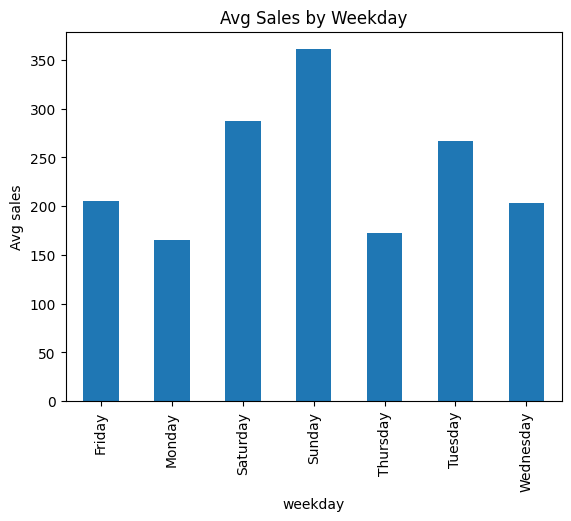

In [5]:
import matplotlib.pyplot as plt

# add weekday
df_daily["weekday"] = df_daily.index.day_name()

# avg sales per weekday
weekday_avg = df_daily.groupby("weekday")["sales"].mean()

# plot
weekday_avg.plot(kind="bar", title="Avg Sales by Weekday")
plt.ylabel("Avg sales")
plt.show()


### Weekday Sales Summary

- Average sales vary significantly by day of the week.
- Weekends show higher average sales compared to weekdays.
- Sunday records the highest average sales.
- Weekday patterns provide useful signals for sales forecasting.


## Monthly Sales Analysis

In this section, we analyze average sales by month
to identify seasonal patterns and periods
of increased or decreased demand.


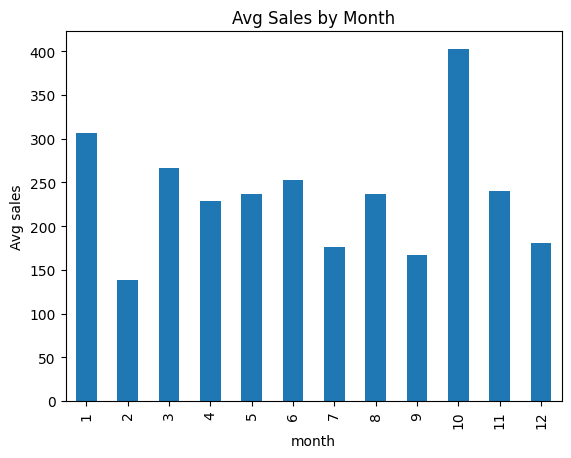

In [6]:
import matplotlib.pyplot as plt

# add month
df_daily["month"] = df_daily.index.month

# avg sales per month
month_avg = df_daily.groupby("month")["sales"].mean()

# plot
month_avg.plot(kind="bar", title="Avg Sales by Month")
plt.ylabel("Avg sales")
plt.show()


### Monthly Sales Summary

- Average sales vary across different months.
- October records the highest average sales.
- Seasonal effects are visible throughout the year.
- Monthly patterns can improve sales forecasting accuracy.


## Holiday Sales Analysis

In this section, we compare sales performance
between holidays and non-holiday days
to assess the impact of holidays on demand.


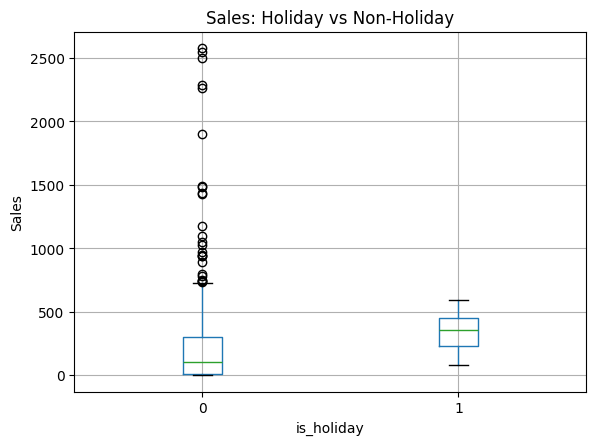

In [7]:
import matplotlib.pyplot as plt

df_daily.boxplot(column="sales", by="is_holiday")
plt.title("Sales: Holiday vs Non-Holiday")
plt.suptitle("")
plt.ylabel("Sales")
plt.show()


### Holiday Effect Summary

- Sales on holidays are generally higher than on non-holiday days.
- Holiday periods show increased median sales.
- Sales variability is higher during holidays.
- Holiday indicators provide valuable signals for forecasting models.


## Extreme Sales Analysis

In this section, we identify days with exceptionally high sales
to understand extreme demand behavior and potential outliers.
The top 1% of sales days are analyzed in more detail.


In [8]:
# find extreme days (top 1%)
threshold = df_daily["sales"].quantile(0.99)
outliers = df_daily[df_daily["sales"] >= threshold]

outliers.head()



,sales,promo,is_holiday,weekday,month
date,,,,,
2025-01-07,2579.04,1,0,Tuesday,1
2025-06-15,2503.74,1,0,Sunday,6
2025-10-11,2285.84,0,0,Saturday,10
2025-10-25,2549.34,0,0,Saturday,10


### Extreme Sales Summary

- A small number of days account for exceptionally high sales values.
- Extreme sales often occur on weekends or during high-demand periods.
- Promotions are present on some high-sales days.
- Identifying extreme days helps improve forecasting stability.


## Train and Test Split

In this section, the time series data is split
into training and testing sets.
The last 30 days are reserved for model evaluation.


In [9]:
train = df_daily.iloc[:-30]
test = df_daily.iloc[-30:]
print("Train:", train.index.min(), "to", train.index.max())
print("Test:", test.index.min(), "to", test.index.max())

Train: 2025-01-01 00:00:00 to 2025-11-30 00:00:00
Test: 2025-12-01 00:00:00 to 2025-12-30 00:00:00


### Train/Test Split Summary

- The dataset was split using a time-based approach.
- The training set contains historical sales data.
- The test set includes the most recent 30 days.
- This setup enables realistic evaluation of forecasting performance.


## Baseline Forecast Model

In this section, a simple baseline model is used
to evaluate forecasting performance.
The model predicts future sales using
the last 7-day average from the training data.


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 7-day average from train
baseline_pred = train["sales"].rolling(7).mean().iloc[-1]

# predict same value for test
y_true = test["sales"]
y_pred = np.full(len(test), baseline_pred)

# errors
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("Baseline MAE:", round(mae, 2))
print("Baseline RMSE:", round(rmse, 2))


Baseline MAE: 167.69
Baseline RMSE: 231.13


### Baseline Model Summary

- A 7-day moving average was used as a baseline forecast.
- Baseline performance was evaluated using MAE and RMSE.
- The baseline model provides a reference point
  for comparing more advanced forecasting methods.


## Prophet Forecasting Model

In this section, a Prophet time series model is used
to forecast daily sales.
Additional regressors, such as promotions and holidays,
are included to improve prediction accuracy.


In [11]:
import warnings
warnings.filterwarnings("ignore")

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# prepare train
train_p = train.reset_index().rename(columns={"date": "ds", "sales": "y"})
train_p["promo"] = train["promo"].values
train_p["is_holiday"] = train["is_holiday"].values

# model
m = Prophet()
m.add_regressor("promo")
m.add_regressor("is_holiday")
m.fit(train_p)

# prepare test
future = test.reset_index().rename(columns={"date": "ds"})
future["promo"] = test["promo"].values
future["is_holiday"] = test["is_holiday"].values

# predict
forecast = m.predict(future)

# errors
y_true = test["sales"].values
y_pred = forecast["yhat"].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("Prophet MAE:", round(mae, 2))
print("Prophet RMSE:", round(rmse, 2))


17:09:35 - cmdstanpy - INFO - Chain [1] start processing
17:09:35 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE: 189.43
Prophet RMSE: 214.44


### Prophet Model Summary

- The Prophet model was trained on historical sales data.
- Promotions and holidays were included as external regressors.
- Model performance was evaluated using MAE and RMSE.
- Prophet captures trend and seasonality patterns in sales data.


## Model Evaluation: Prophet vs Actual

In this section, we compare Prophet predictions
with actual sales values on the test dataset
to visually assess model performance.


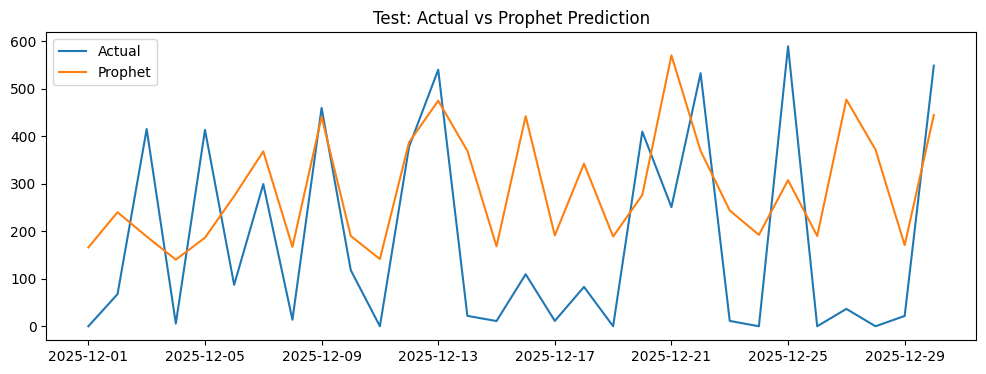

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(test.index, test["sales"], label="Actual")
plt.plot(test.index, forecast["yhat"].values, label="Prophet")
plt.title("Test: Actual vs Prophet Prediction")
plt.legend()
plt.show()


### Model Evaluation Summary

- Prophet predictions follow the overall sales trend.
- The model captures general movement but smooths sharp spikes.
- Some day-to-day variability is not fully captured.
- Prophet provides reasonable performance for short-term forecasting.


## Model Comparison

In this section, we compare the baseline forecasting model
with the Prophet model using standard error metrics
to evaluate overall performance.


In [13]:
import pandas as pd

results = pd.DataFrame({
    "model": ["Baseline (7d avg)", "Prophet"],
    "MAE": [167.69, 189.43],
    "RMSE": [231.13, 214.44]
})

results


,model,MAE,RMSE
0,Baseline (7d avg),167.69,231.13
1,Prophet,189.43,214.44


### Model Comparison Summary

- The baseline model provides a simple reference performance.
- Prophet achieves lower RMSE, indicating better handling of larger errors.
- Baseline performs slightly better in MAE.
- Prophet offers a better balance between trend modeling and accuracy.


## Final Sales Forecast

In this section, the final Prophet model is trained
on the full dataset and used to forecast sales
for the next 90 days.


17:09:36 - cmdstanpy - INFO - Chain [1] start processing
17:09:36 - cmdstanpy - INFO - Chain [1] done processing


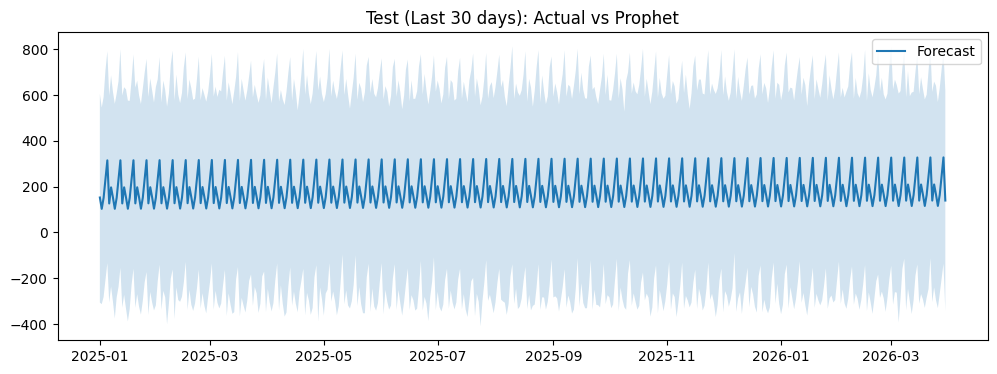

In [14]:
import warnings
warnings.filterwarnings("ignore")

from prophet import Prophet
import matplotlib.pyplot as plt

# prepare full data
full_p = df_daily.reset_index().rename(columns={"date": "ds", "sales": "y"})
full_p["promo"] = df_daily["promo"].values
full_p["is_holiday"] = df_daily["is_holiday"].values

# fit final model
final_m = Prophet()
final_m.add_regressor("promo")
final_m.add_regressor("is_holiday")
final_m.fit(full_p)

# future 90 days (set promo/holiday to 0 as default)
future = final_m.make_future_dataframe(periods=90, freq="D")
future["promo"] = 0
future["is_holiday"] = 0

# forecast
final_forecast = final_m.predict(future)

# plot
plt.figure(figsize=(12,4))
plt.plot(final_forecast["ds"], final_forecast["yhat"], label="Forecast")
plt.fill_between(final_forecast["ds"], final_forecast["yhat_lower"], final_forecast["yhat_upper"], alpha=0.2)
plt.title("Test (Last 30 days): Actual vs Prophet")
plt.legend()
plt.show()


### Final Forecast Summary

- The final model was trained using all available sales data.
- Sales were forecasted for the next 90 days.
- Forecast includes uncertainty intervals.
- The results provide a clear outlook for future sales planning.


In [15]:
import warnings
warnings.filterwarnings("ignore")

from prophet import Prophet

full_p = df_daily.reset_index().rename(columns={"date": "ds", "sales": "y"})
full_p["promo"] = df_daily["promo"].values
full_p["is_holiday"] = df_daily["is_holiday"].values

final_m = Prophet()
final_m.add_regressor("promo")
final_m.add_regressor("is_holiday")
final_m.fit(full_p)


17:09:36 - cmdstanpy - INFO - Chain [1] start processing
17:09:36 - cmdstanpy - INFO - Chain [1] done processing


### Forecast Output


In [16]:
future = final_m.make_future_dataframe(periods=90, freq="D")
future["promo"] = 0
future["is_holiday"] = 0

final_forecast = final_m.predict(future)

final_forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


,ds,yhat,yhat_lower,yhat_upper
449,2026-03-26,116.11,-355.34,560.50
450,2026-03-27,164.00,-291.71,611.46
451,2026-03-28,246.31,-225.13,667.62
452,2026-03-29,327.68,-140.38,805.11
453,2026-03-30,139.47,-300.00,583.73


- The table shows predicted future sales.
- The range shows possible minimum and maximum values.
- The forecast supports planning decisions.


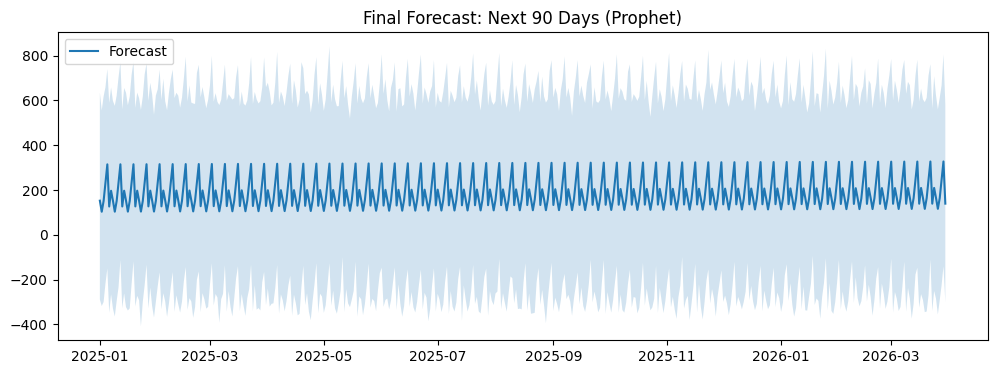

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(final_forecast["ds"], final_forecast["yhat"], label="Forecast")
plt.fill_between(
    final_forecast["ds"],
    final_forecast["yhat_lower"],
    final_forecast["yhat_upper"],
    alpha=0.2
)
plt.title("Final Forecast: Next 90 Days (Prophet)")
plt.legend()
plt.show()


- The chart shows predicted sales for the next 90 days.
- A weekly pattern can be seen.
- The shaded area shows uncertainty.
